##### Logistic Regression

##### Dataset

Download `wisc_bc_data.csv`

Location: https://mitu.co.in/dataset

Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Load the dataset

In [2]:
df = pd.read_csv('datasets/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


##### Separate the input and output variables

In [3]:
# input data
x = df[['Age', 'EstimatedSalary']]

# output data
y = df['Purchased']

In [4]:
np.unique(y)

array([0, 1], dtype=int64)

In [5]:
y.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

<Axes: xlabel='Purchased', ylabel='count'>

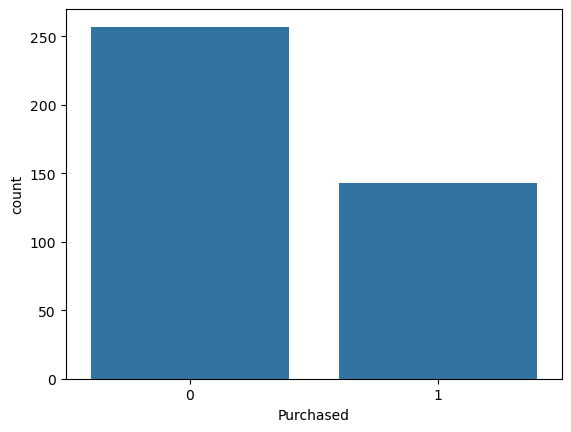

In [6]:
sns.countplot(x = y)

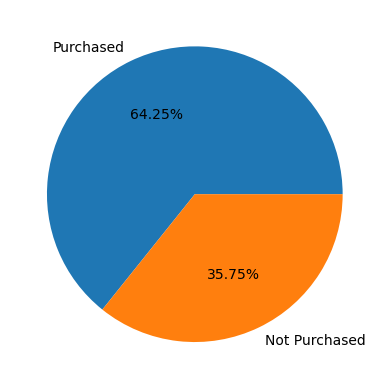

In [7]:
plt.pie(y.value_counts(), labels=['Purchased', 'Not Purchased'], autopct='%2.2f%%'); 

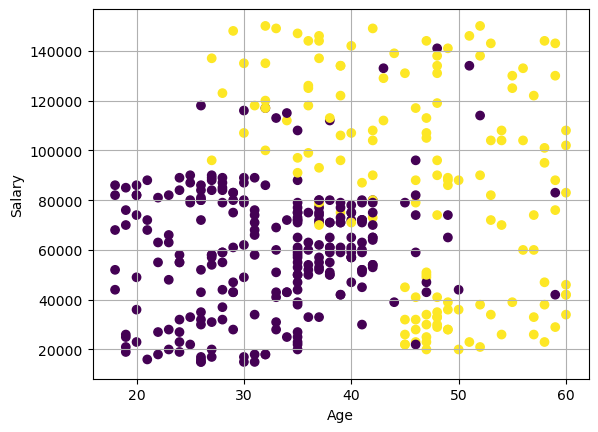

In [8]:
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid()
plt.scatter(x['Age'], x['EstimatedSalary'], c=y)

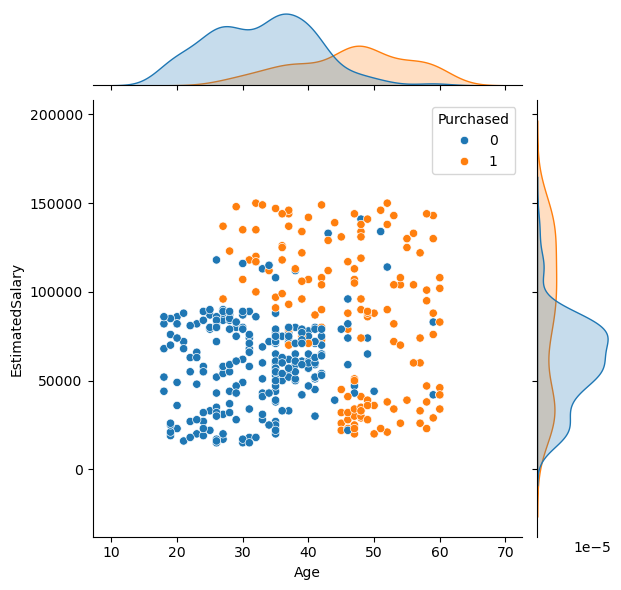

In [9]:
sns.jointplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df)

##### Cross-Validation

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [12]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((300, 2), (100, 2), (300,), (100,))

##### Build the model

In [13]:
# import the class
from sklearn.linear_model import LogisticRegression

In [14]:
classifier = LogisticRegression()

In [15]:
# train the algorithm
classifier.fit(x_train, y_train)

LogisticRegression()

##### Performance Evaluation

In [16]:
y_pred = classifier.predict(x_test)

In [17]:
y_pred, y_test.values

(array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64))

In [18]:
sum(y_pred == y_test), sum(y_pred != y_test)

(89, 11)

In [22]:
import sklearn

In [23]:
sklearn.__version__

'1.5.1'

In [24]:
result = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
})
result

,actual,predicted
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
146,1,0
135,0,0
390,1,0
264,1,1


In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score

In [26]:
confusion_matrix(y_test, y_pred)

array([[65,  3],
       [ 8, 24]], dtype=int64)

In [27]:
y_test.value_counts()

Purchased
0    68
1    32
Name: count, dtype: int64

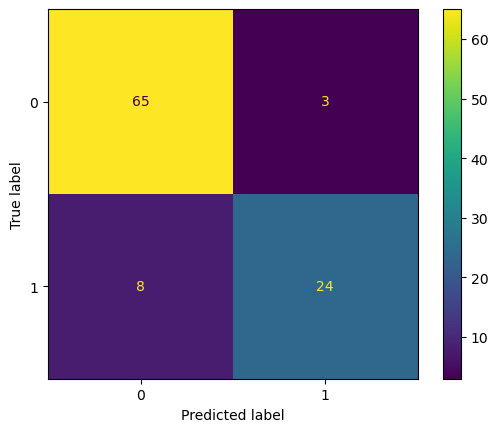

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [29]:
accuracy_score(y_test, y_pred)

0.89

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



In [35]:
# recall <- individual class accuracy
r0 = 65 / 68
r0

0.9558823529411765

In [36]:
# recall <- individual class accuracy
r1 = 24 / 32
r1

0.75

In [37]:
# precision <- true positive rate
p0 = 65 / 73
p0

0.8904109589041096

In [39]:
# precision <- false positive rate
p1 = 24 / 27
p1

0.8888888888888888

In [44]:
# f0 = 2 / (1 / p0 + 1 / r0)
f0 = 2 * (p0 * r0) / (p0 + r0)
f0

0.9219858156028369

In [46]:
# f1 = 2 * (p1 ** -1 + r1 ** -1) ** -1
f1 = 2 * (p1 * r1) / (p1 + r1)
f1

0.8135593220338982

##### Prediction on unseen data

In [47]:
newdf = pd.DataFrame({
    'Age': [31, 38, 55],
    'EstimatedSalary': [60000, 125000, 90000]
})
newdf

,Age,EstimatedSalary
0,31,60000
1,38,125000
2,55,90000


In [48]:
classifier.predict(newdf)

array([0, 1, 1], dtype=int64)

In [49]:
classifier.predict_proba(newdf)

array([[0.94970745, 0.05029255],
       [0.28551961, 0.71448039],
       [0.02932406, 0.97067594]])

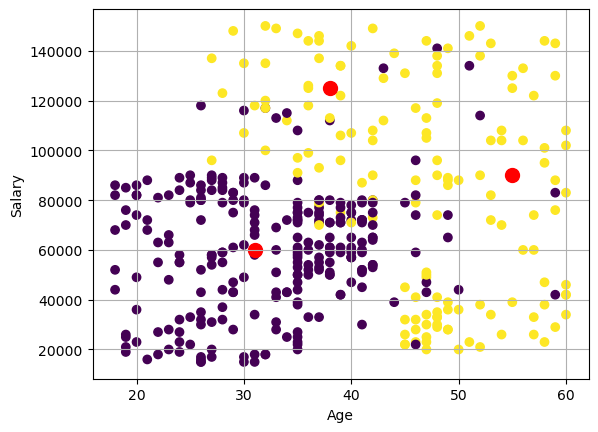

In [51]:
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid()
plt.scatter(x['Age'], x['EstimatedSalary'], c=y)
plt.scatter(newdf['Age'], newdf['EstimatedSalary'], color='r', s=100)